In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

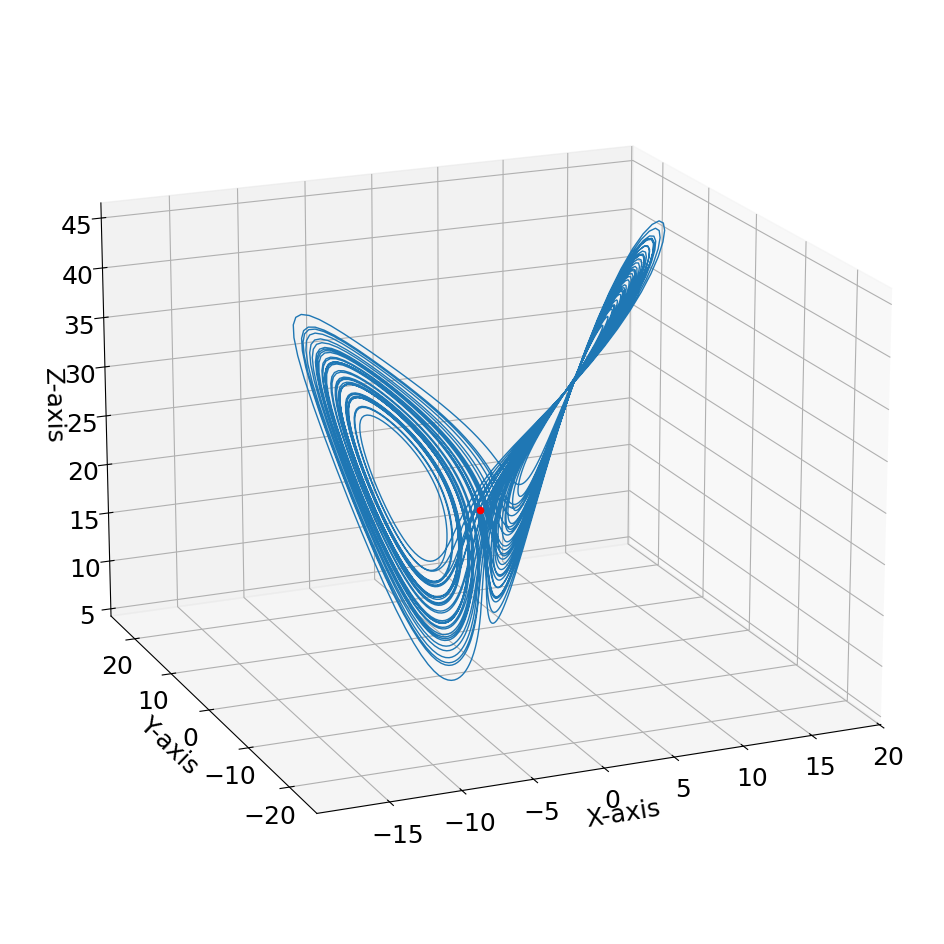

In [2]:
## Simulate the Lorenz System

dt = 0.01
T = 50
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = (0,1,20)

x_t = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))

x, y, z = x_t.T
ax.plot(x, y, z,linewidth=1)
ax.scatter(x0[0],x0[1],x0[2],color='r')
#plt.scatter(10,10,10,color='r')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.view_init(18, -113)
plt.show()

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
dt = 0.01
T = 8
t = np.arange(0, T + dt, dt)
beta = 8 / 3
sigma = 10
rho = 28

# Lorenz system derivatives
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Initial condition and random perturbations
np.random.seed(123)
x0 = np.array([0, 1, 20])
num_trajectories = 100
perturbation_magnitude = 1

# Prepare the plot
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
#ax.scatter(x0[0], x0[1], x0[2], color='r', label='Initial Conditions')

input = []
output = []
# Generate trajectories
for i in range(num_trajectories):
    perturbed_x0 = x0 + np.random.uniform(-perturbation_magnitude, perturbation_magnitude, size=x0.shape)
    x_t = integrate.odeint(lorenz_deriv, perturbed_x0, t, rtol=1e-12, atol=1e-12 * np.ones_like(x0))
    x, y, z = x_t.T
    ax.plot(x, y, z, linewidth=1)
    ax.scatter(x[0], y[0], z[0], color='r')
    input.append(x_t[:-1])
    output.append(x_t[1:])
    #print(x[0], y[0], z[0])

# Add labels
#ax.set_title('Lorenz System with Random Perturbations')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.tight_layout() 
plt.savefig("lorenz_trajectories.pdf", format="pdf", bbox_inches="tight", transparent=True)
# Display the plot interactively
plt.show()


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [5]:
# Convert each array to a PyTorch tensor and concatenate them
input_x = torch.cat([torch.tensor(trajecotry, dtype=torch.float32) for trajecotry in input], dim=0)

# Check the shape of the resulting tensor
print("Input shape:", input_x.shape)

Input shape: torch.Size([80000, 3])


In [6]:
# Convert each array to a PyTorch tensor and concatenate them
output_x = torch.cat([torch.tensor(trajecotry, dtype=torch.float32) for trajecotry in output], dim=0)

# Check the shape of the resulting tensor
print("Output shape:", output_x.shape)

Output shape: torch.Size([80000, 3])


In [ ]:
input_x[1]

tensor([ 0.4114,  0.6018, 18.9441])

In [8]:
print(output_x[0])

tensor([ 0.4114,  0.6018, 18.9441])


In [7]:
import numpy as np

In [4]:
# Custom Layer for Diagonal Matrix
class Layer1(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer1, self).__init__()
        self.units = input_size*2
        self.use_bias = True
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=1
        self.F1_1 = nn.Parameter(torch.empty(2, 2))
        self.F1_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash1 = nn.Parameter(torch.empty(6))

        self.weights_D_2 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p =2
        self.F1_1_2 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash2 = nn.Parameter(torch.empty(6))

        self.weights_D_3 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=3
        self.F1_1_3 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_3 = nn.Parameter(torch.empty(2, 2))
        self.d_dash3 = nn.Parameter(torch.empty(6))

        self.weights_D_4 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=4
        self.F1_1_4 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_4 = nn.Parameter(torch.empty(2, 2))
        self.d_dash4 = nn.Parameter(torch.empty(6))

        self.weights_D_5 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=5
        self.F1_1_5 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_5 = nn.Parameter(torch.empty(2, 2))
        self.d_dash5 = nn.Parameter(torch.empty(6))

        self.weights_D_6 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights p=6
        self.F1_1_6 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_6 = nn.Parameter(torch.empty(2, 2))
        self.d_dash6 = nn.Parameter(torch.empty(6))


        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.units))
            self.bias2 = nn.Parameter(torch.empty(self.units))
            self.bias3 = nn.Parameter(torch.empty(self.units))
            self.bias4 = nn.Parameter(torch.empty(self.units))
            self.bias5 = nn.Parameter(torch.empty(self.units))
            self.bias6 = nn.Parameter(torch.empty(self.units))


        # Initialize weights p=1
        nn.init.xavier_normal_(self.F1_1)
        nn.init.xavier_normal_(self.F1_2)
        nn.init.normal_(self.d_dash1, mean=0.0, std=0.01) 
        # Initialize weights p=2
        nn.init.xavier_normal_(self.F1_1_2)
        nn.init.xavier_normal_(self.F1_2_2)
        nn.init.normal_(self.d_dash2, mean=0.0, std=0.01) 
        # Initialize weights p=3
        nn.init.xavier_normal_(self.F1_1_3)
        nn.init.xavier_normal_(self.F1_2_3)
        nn.init.normal_(self.d_dash3, mean=0.0, std=0.01) 
        # Initialize weights p=4
        nn.init.xavier_normal_(self.F1_1_4)
        nn.init.xavier_normal_(self.F1_2_4)
        nn.init.normal_(self.d_dash4, mean=0.0, std=0.01)
        # Initialize weights p=5
        nn.init.xavier_normal_(self.F1_1_5)
        nn.init.xavier_normal_(self.F1_2_5)
        nn.init.normal_(self.d_dash5, mean=0.0, std=0.01)
        # Initialize weights p=6
        nn.init.xavier_normal_(self.F1_1_6)
        nn.init.xavier_normal_(self.F1_2_6)
        nn.init.normal_(self.d_dash6, mean=0.0, std=0.01) 
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)
            nn.init.normal_(self.bias2, mean=0.0, std=0.01)
            nn.init.normal_(self.bias3, mean=0.0, std=0.01)
            nn.init.normal_(self.bias4, mean=0.0, std=0.01)
            nn.init.normal_(self.bias5, mean=0.0, std=0.01)
            nn.init.normal_(self.bias6, mean=0.0, std=0.01)

    def forward(self, x):
        #Diagonal
        output =  x * self.weights_D  # Element-wise multiplication along the diagonal
        output2 =  x * self.weights_D_2
        output3 =  x * self.weights_D_3
        output4 =  x * self.weights_D_4
        output5 =  x * self.weights_D_5
        output6 =  x * self.weights_D_6
        # J
        output = torch.concat((output, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output2 = torch.concat((output2, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output3 = torch.concat((output3, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output4 = torch.concat((output4, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output5 = torch.concat((output5, torch.zeros(x.shape[0], x.shape[1])), dim=1)
        output6 = torch.concat((output6, torch.zeros(x.shape[0], x.shape[1])), dim=1)


        def calculateF(out, d_dash, F1, F2):
            # Perform element-wise multiplications
            cal1 = out[:, :out.shape[1] // 2] * d_dash[:out.shape[1] // 2]
            cal2 = out[:, out.shape[1] // 2:] * d_dash[:out.shape[1] // 2]

            # Concatenate intermediate results
            out = torch.cat([
                out[:, :out.shape[1] // 2] + out[:, out.shape[1] // 2:],
                cal1 - cal2
            ], dim=1)

            # Conditional computation based on input dimensions
            if out.shape[1] == 4:
                out = torch.cat([
                    torch.matmul(out[:, :2], F1),
                    torch.matmul(out[:, 2:], F2)
                ], dim=1)
            else:
                out1 = out[:, :out.shape[1] // 2]
                out2 = out[:, out.shape[1] // 2:]
                out = torch.cat([
                    calculateF(out1, d_dash[out.shape[1] // 2:], F1, F2),
                    calculateF(out2, d_dash[out.shape[1] // 2:], F1, F2)
                ], dim=1)

            # Interleave rows for final output
            out = torch.cat([out[:, ::2], out[:, 1::2]], dim=1)
            return out

        # Call the recursive function
        out = calculateF(output, self.d_dash1, self.F1_1, self.F1_2)
        out2 = calculateF(output2, self.d_dash2, self.F1_1_2, self.F1_2_2)
        out3 = calculateF(output3, self.d_dash3, self.F1_1_3, self.F1_2_3)
        out4 = calculateF(output4, self.d_dash4, self.F1_1_4, self.F1_2_4)
        out5 = calculateF(output5, self.d_dash5, self.F1_1_5, self.F1_2_5)
        out6 = calculateF(output6, self.d_dash6, self.F1_1_6, self.F1_2_6)

        # Add bias if applicable
        if self.use_bias:
            out = out + self.bias
            out2 = out2 + self.bias2
            out3 = out3 + self.bias3
            out4 = out4 + self.bias4
            out5 = out5 + self.bias5
            out6 = out6 + self.bias6
        return torch.concat((out, out2, out3, out4, out5, out6), dim=1)

In [5]:
# Custom Layer for Diagonal Matrix
class Layer2(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer2, self).__init__()
        self.units = input_size
        self.output_size = output_size
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        self.use_bias = True
        # Initialize trainable weights
        self.F1_1 = nn.Parameter(torch.empty(2, 2))
        self.F1_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash1 = nn.Parameter(torch.empty(6))

        self.weights_D_2 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_2 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_2 = nn.Parameter(torch.empty(2, 2))
        self.d_dash2 = nn.Parameter(torch.empty(6))

        self.weights_D_3 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_3 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_3 = nn.Parameter(torch.empty(2, 2))
        self.d_dash3 = nn.Parameter(torch.empty(6))

        self.weights_D_4 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_4 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_4 = nn.Parameter(torch.empty(2, 2))
        self.d_dash4 = nn.Parameter(torch.empty(6))

        self.weights_D_5 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_5 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_5 = nn.Parameter(torch.empty(2, 2))
        self.d_dash5 = nn.Parameter(torch.empty(6))

        self.weights_D_6 = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        # Initialize trainable weights
        self.F1_1_6 = nn.Parameter(torch.empty(2, 2))
        self.F1_2_6 = nn.Parameter(torch.empty(2, 2))
        self.d_dash6 = nn.Parameter(torch.empty(6))

        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.output_size))
            self.bias2 = nn.Parameter(torch.empty(self.output_size))
            self.bias3 = nn.Parameter(torch.empty(self.output_size))
            self.bias4 = nn.Parameter(torch.empty(self.output_size))
            self.bias5 = nn.Parameter(torch.empty(self.output_size))
            self.bias6 = nn.Parameter(torch.empty(self.output_size))

        # Initialize weights
        nn.init.xavier_normal_(self.F1_1)
        nn.init.xavier_normal_(self.F1_2)
        nn.init.normal_(self.d_dash1, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_2)
        nn.init.xavier_normal_(self.F1_2_2)
        nn.init.normal_(self.d_dash2, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_3)
        nn.init.xavier_normal_(self.F1_2_3)
        nn.init.normal_(self.d_dash3, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_4)
        nn.init.xavier_normal_(self.F1_2_4)
        nn.init.normal_(self.d_dash4, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_5)
        nn.init.xavier_normal_(self.F1_2_5)
        nn.init.normal_(self.d_dash5, mean=0.0, std=0.01)

        nn.init.xavier_normal_(self.F1_1_6)
        nn.init.xavier_normal_(self.F1_2_6)
        nn.init.normal_(self.d_dash6, mean=0.0, std=0.01) 
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)
            nn.init.normal_(self.bias2, mean=0.0, std=0.01)
            nn.init.normal_(self.bias3, mean=0.0, std=0.01)
            nn.init.normal_(self.bias4, mean=0.0, std=0.01)
            nn.init.normal_(self.bias5, mean=0.0, std=0.01)
            nn.init.normal_(self.bias6, mean=0.0, std=0.01)

    def forward(self, x):
        input1 = x[:, :self.units]
        input2 = x[:, self.units:self.units*2]
        input3 = x[:, self.units*2:self.units*3]
        input4 = x[:, self.units*3:self.units*4]
        input5 = x[:, self.units*4:self.units*5]
        input6 = x[:, self.units*5:self.units*6]
        #Diagonal
        output1 =  input1 * self.weights_D
        output2 =  input2 * self.weights_D_2  # Element-wise multiplication along the diagonal
        output3 =  input3 * self.weights_D_3
        output4 =  input4 * self.weights_D_4
        output5 =  input5 * self.weights_D_5
        output6 =  input6 * self.weights_D_6

        def calculateF(out, d_dash, F1, F2):
            # Interleave rows for final output
            out = torch.cat([out[:, ::2], out[:, 1::2]], dim=1)

            # Conditional computation based on input dimensions
            if out.shape[1] == 4:
                out = torch.cat([
                    torch.matmul(out[:, :2], F1),
                    torch.matmul(out[:, 2:], F2)
                ], dim=1)
            else:
                out1 = out[:, :out.shape[1] // 2]
                out2 = out[:, out.shape[1] // 2:]
                out = torch.cat([
                    calculateF(out1, d_dash[out.shape[1] // 2:], F1, F2),
                    calculateF(out2, d_dash[out.shape[1] // 2:], F1, F2)
                ], dim=1)

            # Perform element-wise multiplications
            #cal1 = out[:, :out.shape[1] // 2] * d_dash[:out.shape[1] // 2]
            cal2 = out[:, out.shape[1] // 2:] * d_dash[:out.shape[1] // 2]

            # Concatenate intermediate results
            out = torch.cat([
                out[:, :out.shape[1] // 2] + cal2,
                out[:, :out.shape[1] // 2] - cal2
            ], dim=1)
            
            return out

        # Call the recursive function
        out1 = calculateF(output1, self.d_dash1, self.F1_1, self.F1_2)
        out2 = calculateF(output2, self.d_dash2, self.F1_1_2, self.F1_2_2)
        out3 = calculateF(output3, self.d_dash3, self.F1_1_3, self.F1_2_3)
        out4 = calculateF(output4, self.d_dash4, self.F1_1_4, self.F1_2_4)
        out5 = calculateF(output5, self.d_dash5, self.F1_1_5, self.F1_2_5)
        out6 = calculateF(output6, self.d_dash6, self.F1_1_6, self.F1_2_6)


        # Add bias if applicable
        if self.use_bias:
            out = out1[:, :self.units // 2] + self.bias
            out2 = out2[:, :self.units // 2] + self.bias2
            out3 = out3[:, :self.units // 2] + self.bias3
            out4 = out4[:, :self.units // 2] + self.bias4
            out5 = out5[:, :self.units // 2] + self.bias5
            out6 = out6[:, :self.units // 2] + self.bias6
        return torch.concat((out, out2, out3, out4, out5, out6), dim=1)

In [6]:
# Custom Layer for Diagonal Matrix
class Layer3(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer3, self).__init__()
        self.units = input_size
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        self.use_bias = True
        self.weights_D_2 = nn.Parameter(torch.ones(input_size))
        self.weights_D_3 = nn.Parameter(torch.ones(input_size))
        self.weights_D_4 = nn.Parameter(torch.ones(input_size))
        self.weights_D_5 = nn.Parameter(torch.ones(input_size))
        self.weights_D_6 = nn.Parameter(torch.ones(input_size))

        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.units))
            self.bias2 = nn.Parameter(torch.empty(self.units))
            self.bias3 = nn.Parameter(torch.empty(self.units))
            self.bias4 = nn.Parameter(torch.empty(self.units))
            self.bias5 = nn.Parameter(torch.empty(self.units))
            self.bias6 = nn.Parameter(torch.empty(self.units))
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)
            nn.init.normal_(self.bias2, mean=0.0, std=0.01)
            nn.init.normal_(self.bias3, mean=0.0, std=0.01)
            nn.init.normal_(self.bias4, mean=0.0, std=0.01)
            nn.init.normal_(self.bias5, mean=0.0, std=0.01)
            nn.init.normal_(self.bias6, mean=0.0, std=0.01)

    def forward(self, x):
        input1 = x[:, :self.units]
        input2 = x[:, self.units:self.units*2]
        input3 = x[:, self.units*2:self.units*3]
        input4 = x[:, self.units*3:self.units*4]
        input5 = x[:, self.units*4:self.units*5]
        input6 = x[:, self.units*5:self.units*6]

        #Diagonal
        output =  input1 * self.weights_D  # Element-wise multiplication along the diagonal
        output2 =  input2 * self.weights_D_2
        output3 =  input3 * self.weights_D_3
        output4 =  input4 * self.weights_D_4 
        output5 =  input5 * self.weights_D_5 
        output6 =  input6 * self.weights_D_6 

        # Add bias if applicable
        if self.use_bias:
            out = output + self.bias
            out2 = output2 + self.bias2
            out3 = output3 + self.bias3
            out4 = output4 + self.bias4
            out5 = output5 + self.bias5
            out6 = output6 + self.bias6
        return torch.concat((out, out2, out3, out4, out5, out6), dim=1)

In [7]:
# Custom Layer for Diagonal Matrix
class Layer4(nn.Module):
    def __init__(self, input_size, output_size):
        super(Layer4, self).__init__()
        self.units = input_size
        #assert input_size == output_size, "Diagonal layers must have input_size == output_size"
        self.weights_D = nn.Parameter(torch.ones(input_size))  # Only store the diagonal elements
        self.use_bias = True
        self.weights_D_2 = nn.Parameter(torch.ones(input_size))
        self.weights_D_3 = nn.Parameter(torch.ones(input_size))
        self.weights_D_4 = nn.Parameter(torch.ones(input_size))
        self.weights_D_5 = nn.Parameter(torch.ones(input_size))
        self.weights_D_6 = nn.Parameter(torch.ones(input_size))

        if self.use_bias:
            self.bias = nn.Parameter(torch.empty(self.units))
        if self.use_bias:
            nn.init.normal_(self.bias, mean=0.0, std=0.01)

    def forward(self, x):
        input1 = x[:, :self.units]
        input2 = x[:, self.units:self.units*2]
        input3 = x[:, self.units*2:self.units*3]
        input4 = x[:, self.units*3:self.units*4]
        input5 = x[:, self.units*4:self.units*5]
        input6 = x[:, self.units*5:self.units*6]

        #Diagonal
        output =  input1 * self.weights_D  # Element-wise multiplication along the diagonal
        output2 =  input2 * self.weights_D_2
        output3 =  input3 * self.weights_D_3
        output4 =  input4 * self.weights_D_4
        output5 =  input5 * self.weights_D_5
        output6 =  input6 * self.weights_D_6 

        return output + output2 + output3 + output4 + output5 + output6 + self.bias

In [8]:
import torch_levenberg_marquardt as tlm

# Set PyTorch to use high precision for matrix multiplication
torch.set_float32_matmul_precision('high')

# Detect CUDA device for acceleration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [13]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Define dataset



In [9]:
# %%
# Define a function to create the neural network model
def create_model() -> torch.nn.Module:
    return torch.nn.Sequential(
        Layer1(4, 4),
        torch.nn.Tanh(),
        Layer2(8, 4),
        torch.nn.Sigmoid(),
        Layer3(4, 4),
        torch.nn.ReLU(),
        Layer4(4, 4),
    ).to(device)

In [111]:
# # Neural Network Model
# class CustomNN(nn.Module):
#     def __init__(self):
#         super(CustomNN, self).__init__()
#         self.layer1 = Layer1(4, 4)
#         self.activation1 = nn.LeakyReLU(negative_slope=0.02)
#         self.layer2 = Layer2(8, 4)
#         self.activation2 = nn.LeakyReLU(negative_slope=0.02)
#         self.layer3 = Layer3(4, 4)
#         self.activation3 = nn.LeakyReLU(negative_slope=0.02)
#         self.layer4 = Layer4(4, 4)

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.activation1(x)
#         x = self.layer2(x)
#         x = self.activation2(x)
#         x = self.layer3(x)
#         x = self.activation3(x)
#         x = self.layer4(x)
#         return x

In [10]:
import time
import torch
import torch_levenberg_marquardt as tlm
from bokeh.plotting import figure, output_notebook, show
from torch.utils.data import TensorDataset

In [17]:
input_x.shape

torch.Size([80000, 3])

In [24]:
# Add a column of zeros to make input and output m x 4
input_x_new = np.hstack([input_x, np.zeros((input_x.shape[0], 1))])  # Pad inputs with zeros
output_x_new = np.hstack([output_x, np.zeros((output_x.shape[0], 1))])  # Pad outputs with zeros

# Convert NumPy arrays to PyTorch tensors
input_x_new = torch.tensor(input_x_new, dtype=torch.float32)
output_x_new = torch.tensor(output_x_new, dtype=torch.float32)

dataset = TensorDataset(input_x_new, output_x_new)

# Split sizes: 80% training, 20% validation
train_size = int(0.8 * len(dataset))  # 80% of 80,000
val_size = len(dataset) - train_size  # Remaining 20%

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


# Create dataset and dataloader
#train_dataset = TensorDataset(input_x, output_x)
train_loader = tlm.utils.FastDataLoader(
    train_dataset,
    batch_size=1000,
    repeat=10,
    shuffle=True,
    device=device,
)

val_loader = tlm.utils.FastDataLoader(
    val_dataset,
    batch_size=1000,
    repeat=10,
    shuffle=True,
    device=device,
)

Epoch 2/20:  64%|██████▍   | 411/640 [01:11<00:39,  5.76it/s, loss=1.5751e+01, damping=1.0000e-04, attempts=1]


In [57]:
# # Custom Dataset for sequential data
# class TimeSeriesDataset(Dataset):
#     def __init__(self, input, output):
#         # Generate (x, y) pairs from sequential data

#         # Add a column of zeros to make input and output m x 4
#         self.x = np.hstack([input, np.zeros((input.shape[0], 1))])  # Pad inputs with zeros
#         self.y = np.hstack([output, np.zeros((output.shape[0], 1))])  # Pad outputs with zeros

#         # Shuffle the pairs
#         indices = np.random.permutation(len(self.x))
#         self.x = self.x[indices]
#         self.y = self.y[indices]

#     def __len__(self):
#         return len(self.x)

#     def __getitem__(self, index):
#         return self.x[index], self.y[index]

In [58]:
# from sklearn.model_selection import train_test_split

# # Function to create train and validation loaders
# def create_train_val_loaders(input, output, batch_size=64, val_split=0.2):
#     # Split data into training and validation sets
#     x_train, x_val, y_train, y_val = train_test_split(input, output, test_size=val_split, random_state=42)
    
#     # Create Dataset objects for training and validation
#     train_dataset = TimeSeriesDataset(x_train, y_train)
#     val_dataset = TimeSeriesDataset(x_val, y_val)
    
#     # Create DataLoader objects for training and validation
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
#     return train_loader, val_loader

# # Example usage
# #input_data = np.random.rand(1000, 3)  # Replace with your input data
# #output_data = np.random.rand(1000, 3)  # Replace with your output data

# train_loader, val_loader = create_train_val_loaders(input_x, output_x, batch_size=64, val_split=0.2)


In [59]:
# def train_model(model, train_dataloader, val_dataloader, criterion, optimizer, epochs=20):
#     model.train()
#     train_loss_per_epoch = []
#     val_loss_per_epoch = []
    
#     for epoch in range(epochs):
#         # Training phase
#         total_train_loss = 0
#         for x, y in train_dataloader:
#             x, y = x.float(), y.float()
#             optimizer.zero_grad()
#             outputs = model(x)
#             loss = criterion(outputs, y)
#             loss.backward()
#             optimizer.step()
#             total_train_loss += loss.item()
        
#         avg_train_loss = total_train_loss / len(train_dataloader)
#         train_loss_per_epoch.append(avg_train_loss)
        
#         # Validation phase
#         model.eval()  # Set the model to evaluation mode
#         total_val_loss = 0
#         with torch.no_grad():  # Disable gradient computation
#             for x_val, y_val in val_dataloader:
#                 x_val, y_val = x_val.float(), y_val.float()
#                 outputs = model(x_val)
#                 val_loss = criterion(outputs, y_val)
#                 total_val_loss += val_loss.item()
        
#         avg_val_loss = total_val_loss / len(val_dataloader)
#         val_loss_per_epoch.append(avg_val_loss)
        
#         print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.8f}, Val Loss: {avg_val_loss:.8f}")
    
#     return train_loss_per_epoch, val_loss_per_epoch



In [60]:
# # Example usage
# if __name__ == "__main__":
#     # Simulated data for demonstration (replace with your actual data)
#     data = x_t  # Random data: 50,001 samples of (x, y, z)

#     # Prepare dataset and dataloader
#     #dataloader = prepare_data(input_x, output_x)

#     model = CustomNN()
#     criterion = nn.MSELoss()  # Example: Mean Squared Error loss
#     optimizer = optim.Adam(model.parameters(), lr=0.001)

#     # Train the model
#     epochs = 50
#     train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, epochs)

#     # Plot the training and validation loss (optional)
#     import matplotlib.pyplot as plt

#     plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
#     plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.title('Training and Validation Loss')
#     plt.show()
#     # Save the model
#     #torch.save(model.state_dict(), "time_series_model.pth")


In [25]:
# Example usage
if __name__ == "__main__":
    # Simulated data for demonstration (replace with your actual data)
    data = x_t  # Random data: 50,001 samples of (x, y, z)

    # Prepare dataset and dataloader
    #dataloader = prepare_data(input_x, output_x)

    model = create_model()

    module_lm = tlm.training.LevenbergMarquardtModule(
    model=model,
    loss_fn=tlm.loss.MSELoss(),
    learning_rate=1.0,
    attempts_per_step=20,
    solve_method='qr',
    )

    loss_all, val_loss_all = tlm.utils.fit(
    module_lm,
    train_loader,
    epochs=20,
    overwrite_progress_bar = False,
    val_loader=val_loader,
    )
    # Save the model
    #torch.save(model.state_dict(), "time_series_model.pth")


                                                                                                              
Epoch 1/20: 100%|██████████| 640/640 [00:55<00:00, 11.52it/s, loss=1.6706e-05, damping=1.0000e-03, attempts=2]


Epoch 1 complete. Average loss: 5.6987e-01


                                                                                                              
Epoch 2/20: 100%|██████████| 640/640 [00:57<00:00, 11.22it/s, loss=8.6261e-06, damping=1.0000e-03, attempts=2]


Epoch 2 complete. Average loss: 1.2031e-05


                                                                                                              
Epoch 3/20: 100%|██████████| 640/640 [01:00<00:00, 10.66it/s, loss=8.0819e-06, damping=1.0000e-03, attempts=2]


Epoch 3 complete. Average loss: 8.2458e-06


                                                                                                              
Epoch 4/20: 100%|██████████| 640/640 [01:00<00:00, 10.64it/s, loss=6.3890e-06, damping=1.0000e-03, attempts=2]


Epoch 4 complete. Average loss: 6.2291e-06


                                                                                                              
Epoch 5/20: 100%|██████████| 640/640 [01:00<00:00, 10.58it/s, loss=4.5934e-06, damping=1.0000e-03, attempts=2]


Epoch 5 complete. Average loss: 5.1648e-06


                                                                                                              
Epoch 6/20: 100%|██████████| 640/640 [00:59<00:00, 10.82it/s, loss=3.9414e-06, damping=1.0000e-03, attempts=2]


Epoch 6 complete. Average loss: 4.5853e-06


                                                                                                              
Epoch 7/20: 100%|██████████| 640/640 [00:58<00:00, 10.99it/s, loss=4.1121e-06, damping=1.0000e-03, attempts=2]


Epoch 7 complete. Average loss: 4.1661e-06


                                                                                                              
Epoch 8/20: 100%|██████████| 640/640 [00:59<00:00, 10.72it/s, loss=3.5313e-06, damping=1.0000e-03, attempts=2]


Epoch 8 complete. Average loss: 3.8780e-06


                                                                                                              
Epoch 9/20: 100%|██████████| 640/640 [01:02<00:00, 10.21it/s, loss=4.2000e-06, damping=1.0000e-03, attempts=2]


Epoch 9 complete. Average loss: 3.6369e-06


                                                                                                               
Epoch 10/20: 100%|██████████| 640/640 [00:59<00:00, 10.84it/s, loss=3.8874e-06, damping=1.0000e-03, attempts=2]


Epoch 10 complete. Average loss: 3.4322e-06


                                                                                                               
Epoch 11/20: 100%|██████████| 640/640 [00:59<00:00, 10.79it/s, loss=2.6351e-06, damping=1.0000e-03, attempts=2]


Epoch 11 complete. Average loss: 3.2570e-06


                                                                                                               
Epoch 12/20: 100%|██████████| 640/640 [00:58<00:00, 11.02it/s, loss=2.5035e-06, damping=1.0000e-03, attempts=2]


Epoch 12 complete. Average loss: 3.1075e-06


                                                                                                               
Epoch 13/20: 100%|██████████| 640/640 [00:58<00:00, 10.86it/s, loss=3.1483e-06, damping=1.0000e-03, attempts=2]


Epoch 13 complete. Average loss: 2.9663e-06


                                                                                                               
Epoch 14/20: 100%|██████████| 640/640 [01:18<00:00,  8.17it/s, loss=2.5163e-06, damping=1.0000e-03, attempts=2]


Epoch 14 complete. Average loss: 2.8394e-06


                                                                                                               
Epoch 15/20: 100%|██████████| 640/640 [01:05<00:00,  9.75it/s, loss=2.8697e-06, damping=1.0000e-03, attempts=2]


Epoch 15 complete. Average loss: 2.7337e-06


                                                                                                               
Epoch 16/20: 100%|██████████| 640/640 [01:07<00:00,  9.43it/s, loss=2.5999e-06, damping=1.0000e-03, attempts=2]


Epoch 16 complete. Average loss: 2.6193e-06


                                                                                                               
Epoch 17/20: 100%|██████████| 640/640 [01:03<00:00, 10.01it/s, loss=2.8387e-06, damping=1.0000e-03, attempts=2]


Epoch 17 complete. Average loss: 2.5216e-06


                                                                                                               
Epoch 18/20: 100%|██████████| 640/640 [01:02<00:00, 10.20it/s, loss=2.7271e-06, damping=1.0000e-03, attempts=2]


Epoch 18 complete. Average loss: 2.4391e-06


                                                                                                               
Epoch 19/20: 100%|██████████| 640/640 [01:01<00:00, 10.32it/s, loss=1.9713e-06, damping=1.0000e-03, attempts=2]


Epoch 19 complete. Average loss: 2.3578e-06


                                                                                                               
Epoch 20/20: 100%|██████████| 640/640 [01:01<00:00, 10.39it/s, loss=2.8845e-06, damping=1.0000e-03, attempts=2]

Epoch 20 complete. Average loss: 2.2787e-06


In [148]:
# Calculate and display the number of parameters for each layer
print("Layer Name | Number of Parameters")
print("---------------------------------")
total_params = 0
for name, param in loaded_model.named_parameters():
    num_params = param.numel()  # Number of elements in the parameter tensor
    total_params += num_params
    print(f"{name:<20} {num_params}")

print("---------------------------------")
print(f"Total parameters: {total_params}")

Layer Name | Number of Parameters
---------------------------------
0.weights_D          4
0.F1_1               4
0.F1_2               4
0.d_dash1            6
0.weights_D_2        4
0.F1_1_2             4
0.F1_2_2             4
0.d_dash2            6
0.weights_D_3        4
0.F1_1_3             4
0.F1_2_3             4
0.d_dash3            6
0.weights_D_4        4
0.F1_1_4             4
0.F1_2_4             4
0.d_dash4            6
0.weights_D_5        4
0.F1_1_5             4
0.F1_2_5             4
0.d_dash5            6
0.weights_D_6        4
0.F1_1_6             4
0.F1_2_6             4
0.d_dash6            6
0.bias               8
0.bias2              8
0.bias3              8
0.bias4              8
0.bias5              8
0.bias6              8
2.weights_D          8
2.F1_1               4
2.F1_2               4
2.d_dash1            6
2.weights_D_2        8
2.F1_1_2             4
2.F1_2_2             4
2.d_dash2            6
2.weights_D_3        8
2.F1_1_3             4
2.F1_2_3    

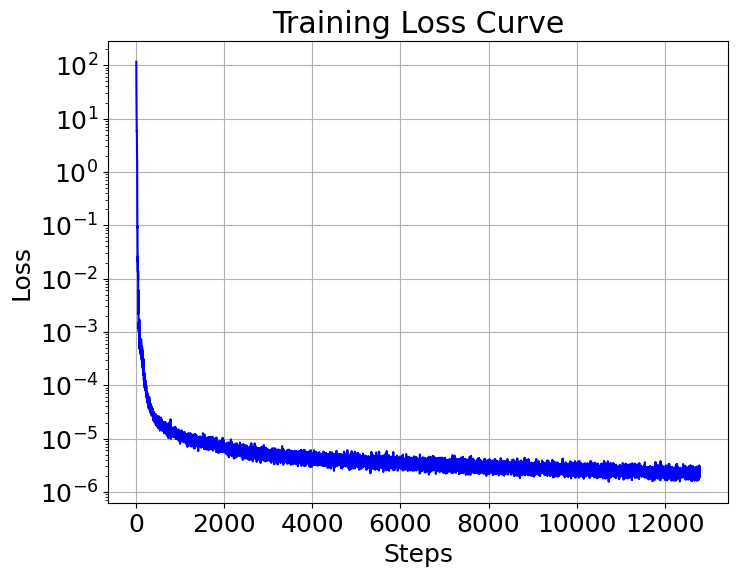

In [31]:
# Plot the loss curve
loss_all_cpu = [loss_item.cpu().numpy() for loss_item in loss_all]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_all_cpu) + 1), loss_all_cpu, linestyle="-", color="b")
plt.title("Training Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()

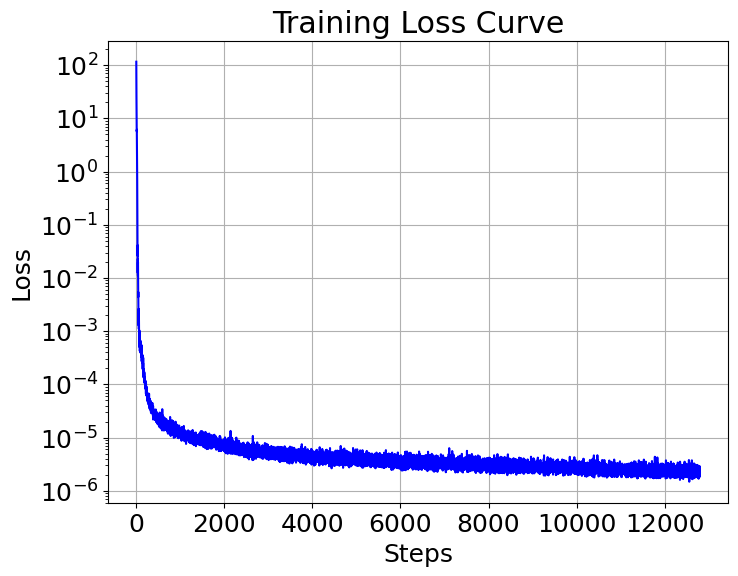

In [33]:
# Plot the loss curve
loss_all_cpu = [loss_item for loss_item in val_loss_all]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_all_cpu) + 1), loss_all_cpu, linestyle="-", color="b")
plt.title("Training Loss Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.yscale("log")
plt.grid(True)
plt.show()

In [30]:
import torch

# Define a function to save the trained model
def save_model(model: torch.nn.Module, file_path: str):
    # Save the model's state dictionary
    torch.save(model.state_dict(), file_path)

# Save the trained model to a file
save_model(model, "SNN_model_p_6_new.pth")
print("Model saved to 'trained_model.pth'")


Model saved to 'trained_model.pth'


In [34]:
import pandas as pd

# Create a DataFrame for the loss values
loss_df = pd.DataFrame({
    "Step": range(1, len(loss_all_cpu) + 1),
    "Loss": loss_all_cpu
})

# Save the DataFrame to a CSV file
loss_df.to_csv("SNN_loss_curve_p_6_new_vali.csv", index=False)
print("Loss curve saved to 'loss_curve.csv'")


Loss curve saved to 'loss_curve.csv'


In [16]:
# Load the saved model
def load_model(file_path: str, device: torch.device) -> torch.nn.Module:
    model = create_model().to(device)  # Initialize the model
    model.load_state_dict(torch.load(file_path, map_location=device))  # Load the state dictionary
    model.eval()  # Set the model to evaluation mode
    return model

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "SNN_model_p_6.pth"  # Path to your saved model
loaded_model = load_model(model_path, "cpu")

print("Model successfully loaded!")

Model successfully loaded!


/tmp/ipykernel_788/91669994.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(file_path, map_location=device))  # Load the state dictionar

In [35]:
loaded_model = model

In [ ]:
#Set model to evaluation mode
#model = loaded_model.to("cpu")
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [6, 6]
loaded_model.eval()

# Generate a trajectory using the model
def generate_trajectory(initial_condition, num_steps):
    trajectory = []
    current_state = torch.tensor(initial_condition, dtype=torch.float32)  # Convert initial condition to tensor

    for _ in range(num_steps):
        # Predict the next state
        next_state = loaded_model(current_state)

        # Append the predicted state to the trajectory
        trajectory.append(next_state.detach().numpy())

        # Use the output of the model as input for the next step
        current_state = next_state

    return np.array(trajectory)

# Example initial condition (x0, y0, z0)

initial_condition = x_t[4000]
initial_condition = np.concatenate([initial_condition, [0]], axis=0)
initial_condition = torch.tensor(initial_condition)
initial_condition = initial_condition.unsqueeze(0)

# Number of steps for the trajectory
num_steps = 600

# Generate the trajectory
trajectory = generate_trajectory(initial_condition, num_steps)

# Plot the trajectory
x, y, z, k = trajectory.squeeze(1).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label="Generated Trajectory by StNN")

x_a, y_a, z_a = x_t[4000:4600].T
ax.plot(x_a, y_a, z_a,linewidth=1, label="Actual Trajectory")


# Highlight the starting points with red circles
ax.scatter(x[0], y[0], z[0], color='red', s=100, marker='o')  # Starting point of generated trajectory
ax.scatter(x_a[1], y_a[1], z_a[1], color='red', s=100, label="Initial Condition", marker='o')  # Starting point of actual trajectory


ax.set_xlabel('X Axis', fontsize=15, labelpad=10)
ax.set_ylabel('Y Axis', fontsize=15, labelpad=10)
ax.set_zlabel('Z Axis', fontsize=15, labelpad=10)
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout() 
ax.set_box_aspect(aspect=None, zoom=0.85)
plt.savefig("predict_SNN_3D.pdf", format="pdf", bbox_inches="tight", transparent=True)
plt.show()

In [79]:
trajectory.squeeze(1).shape

(600, 4)

In [ ]:
import pandas as pd
# Create a DataFrame
df = pd.DataFrame({
    'Epoch': epochs,
    'Loss': loss_per_epoch
})

# Save DataFrame to CSV
df.to_csv('loss_values_4_head_SNN.csv', index=False)

In [66]:
x_test.shape

(500, 3)

In [ ]:
# Predict on Test Data
#x_pred = model.simulate(x_test[0], t_test)
plt.rcParams['font.size'] = 15
x_pred = trajectory.squeeze(1)[:, :-1]
x_test = x_t[4000:4600]
t_test = t[4000:4600]
# Calculate Prediction Error
mse = np.mean((x_pred - x_test) ** 2, axis=0)
print(f"Mean Squared Error for each variable (x, y, z): {mse}")
print(f"Total Mean Squared Error: {np.mean(mse)}")

# Plot Results
fig = plt.figure(figsize=(12, 6))
time = np.arange(x_test.shape[0]) * 0.01
# Plot x
plt.subplot(3, 1, 1)
plt.plot(time, x_test[:, 0], label="Ground Truth", color="blue")
plt.plot(time, x_pred[:, 0], label="Predicted", linestyle="--", color="red")
plt.ylabel("x")
plt.legend()

# Plot y
plt.subplot(3, 1, 2)
plt.plot(time, x_test[:, 1], label="True y", color="blue")
plt.plot(time, x_pred[:, 1], label="Predicted y", linestyle="--", color="red")
plt.ylabel("y")

# Plot z
plt.subplot(3, 1, 3)
plt.plot(time, x_test[:, 2], label="True z", color="blue")
plt.plot(time, x_pred[:, 2], label="Predicted z", linestyle="--", color="red")
plt.ylabel("z")
plt.xlabel("Time")
#plt.legend()
# Save the plot to a PDF file
output_file = "predicted_SNN_p_6.pdf"
plt.savefig(output_file, format="pdf", bbox_inches="tight")
#plt.tight_layout()
plt.show()

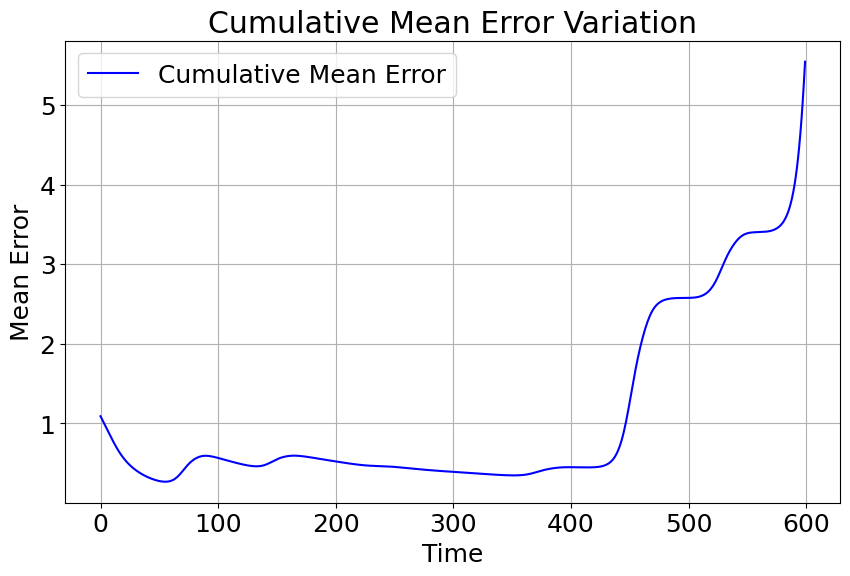

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming x_pred and x_test are already defined as in your code.

# Calculate Prediction Error
error = (x_pred - x_test) ** 2  # Squared error for each variable (x, y, z)
mean_error_per_timestep = np.mean(error, axis=1)  # Mean error across x, y, z for each time step
cumulative_mean_error = np.cumsum(mean_error_per_timestep) / np.arange(1, len(mean_error_per_timestep) + 1)  # Cumulative mean error

# Save to CSV
output_csv_file = "cumulative_mean_error_p_6.csv"
pd.DataFrame({"Time Step": np.arange(len(cumulative_mean_error)), "Cumulative Mean Error": cumulative_mean_error}).to_csv(output_csv_file, index=False)

# Plot Mean Error Variation
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean_error, label="Cumulative Mean Error", color="blue")
plt.title("Cumulative Mean Error Variation")
plt.xlabel("Time")
plt.ylabel("Mean Error")
plt.legend()
plt.grid()

# # Save the plot to a PDF file
# output_pdf_file = "cumulative_mean_error_single_curve.pdf"
# plt.savefig(output_pdf_file, format="pdf", bbox_inches="tight")
# plt.tight_layout()
# plt.show()

# print(f"Cumulative mean error saved to {output_csv_file}")
